<a href="https://colab.research.google.com/github/GiovanaThais/arqPython/blob/master/analisador_lexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokens
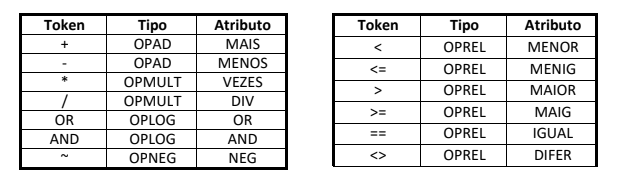

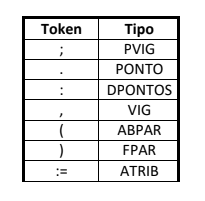


In [1]:
import sys
import re

Esse código é uma função Python que lê um arquivo de texto e executa uma análise léxica no conteúdo do arquivo, retornando uma lista de tokens.

A função open_file() é responsável por abrir o arquivo de texto especificado na linha de comando (se houver) ou abrir um arquivo de teste padrão ("teste.txt") caso contrário. Em seguida, ela retorna uma lista contendo as linhas do arquivo aberto.

A função an_lex(arquivo) executa a análise léxica nas linhas do arquivo. Ele percorre cada linha do arquivo e para cada palavra (separada por espaços), verifica se ela corresponde a um dos padrões definidos nos vários blocos de código elif.

Os padrões que são correspondidos incluem comentários, operadores, números, palavras-chave e identificadores. Cada padrão correspondido resulta na adição do token correspondente à lista token_final.

Se alguma palavra não corresponder a nenhum dos padrões definidos, a função retornará uma mensagem de erro indicando a linha onde ocorreu o erro.

Por fim, a função retorna a lista de tokens gerada para que possa ser usada em outro lugar do código.


In [ ]:
#Definindo os tokens 

tokens = {'+'  :('<MAIS> <OPAD>'),
          '-'  :('<MENOS> <OPAD>'),
          '*'  :('<VEZES> <OPMULT>'),
          '/'  :('<DIV> <OPMULT>'),
          'OR' :('<OR> <OPGLOG>'),
          'AND':('<AND> <OPGLOG>'),
          '~'  :('<NEG> <OPNEG>'),
          '<'  :('<MENOR> <OPREL>'),
          '<=' :('<MENIG> <OPREL>'),
          '>'  :('<MAIOR> <OPREL>'),
          '>=' :('<MAIG> <MAIOR>'),
          '==' :('<IGUAL> <OPREL>'),
          '<>' :('<DIFER> <OPREL>'),
          ':'  :('<DPONTOS'),
          ';'  :('<PVIG>'),
          '.'  :('<PONTO>'),
          ','  :('<VIG>'),
          '('  :('<ABPAR>'),
          ')'  :('<FPAR>'),
          ':=' :('<ATRIB>')
          }

operadores ={'+'  :('+'),
          '-'  :('-'),
          '*'  :('*'),
          '/'  :('/'),
          'OR' :('OR'),
          'AND':('AND'),
          '~'  :('~'),
          '<'  :('<'),
          '<=' :('<='),
          '>'  :('>'),
          '>=' :('>='),
          '==' :('=='),
          '<>' :('<>'),
          ':'  :(':'),
          ';'  :(';'),
          '.'  :('.'),
          ','  :(','),
          '('  :('('),
          ')'  :(')'),
          ':=' :(':=')
          }

def open_file():
    try:
        nome = sys.argv[1]
        arquivo = open(nome, "r")
    except Exception as e:
        arquivo = open("teste.txt", "r")
    return list(arquivo)

arquivo = open_file()




#Lendo o arquivo



class AnalisadorLexico:
  def __init__(self,arquivo, tokens, operadores):
    self.tokens = tokens
    self.operadores = operadores
    self.arquivo = arquivo
    self.novos_tokens = []
    self.novos_operadores = []
  
  def an_lex(self):
    linha = 0
    for i in self.arquivo:
      linha += 1
      for k in i.split():

        if re.match('//.*?$|//.*?$', k):
          break

        elif re.match('--.*?$|\|', k):
            ...
        
        #elif re.match('[-+]?\d+', k):
        elif re.match(r'^[+-]?[0-9]+(\.[0-9]+)?$', k):
          self.novos_tokens.append('<NUM>')
          self.novos_operadores.append(k)

        elif k in tokens:
          self.novos_tokens.append(tokens[k])
          self.novos_operadores.append(operadores[k])
          
        elif re.match('[a-zA-Z_][a-zA-Z0-9_]*', k):
          if '.' in k:
            k = k.split('.')
            
            self.novos_tokens.append('<STRING>')
            self.novos_tokens.append('<PONTO>')
            self.novos_operadores.append(k[0])
            self.novos_operadores.append('.')
          else:
            self.novos_tokens.append('<STRING>')
            self.novos_operadores.append(k)
        else:
          return f'Erro ocorreu na linha: {linha}'
    return self.novos_operadores
  def exibir(self):
    self.an_lex()
    resultado = list((zip(self.novos_operadores,self.novos_tokens)))

    print(*(resultado))
    
#PROGRAM IDENTIFIER ; VAR IDENTIFIER : INTEGER ; BEGIN IDENTIFIER := IDENTIFIER END.     
main = AnalisadorLexico(arquivo, tokens, operadores)
tokens_analisados = main.an_lex()



Prog --> PROGRAM IDENTIFIER PTVIG Decls CmdComp PONTO

Decls --> ε | VAR ListDecl

ListDecl --> DeclTip ListDecl'

ListDecl' --> ε | VIRG DeclTip ListDecl'

DeclTip --> ListId DPONTOS Tip PTVIG

ListId --> IDENTIFIER ListId'

ListId' --> ε | VIRG IDENTIFIER ListId'

Tip --> INTEGER | BOOLEAN | STRING

CmdComp --> BEGIN Listcmd END

Listcmd --> ε | Cmd Listcmd'

Listcmd' --> ε | PTVIG Cmd Listcmd'

Cmd --> CmdIf | CmdWhile | CmdRead | CmdWrite | CmdAtrib | CmdComp

CmdIf --> IF Expr THEN Cmd CmdIf'

CmdIf' --> ε | ELSE Cmd

CmdWhile --> WHILE Expr DO Cmd

CmdRead --> READ ABPAR ListId FPAR

CmdWrite --> WRITE ABPAR Listw FPAR

Listw --> Elemw Listw'

Listw' --> ε | VIRG Elemw Listw'

Elemw --> Expr | CADEIA

CmdAtrib --> IDENTIFIER ATRIBUICAO Expr

Expr --> Expr1 Expr'

Expr' --> OPREL Expr | ε

Expr1 --> Expr2 Expr1'

Expr1' --> OPAD Expr1 | ε

Expr2 --> Expr3 Expr2'

Expr2' --> OPMULT Expr2 | ε

Expr3 --> IDENTIFIER | CTE | ABPAR Expr FPAR | TRUE | FALSE | OPNEG Expr

In [ ]:
class AnalisadorSintatico:
  def __init__(self, tokens):
    self.tokens = tokens
    self.token_atual = None
    self.index = -1
    self.erros = []

  def parse(self):
    self.proxima_palavra()
    self.program()
    if self.token_atual != '.':
        self.erro('Token inesperado após o fim da análise')
    if len(self.erros) == 0:
        print('A palavra está sintaticamente correta')
    else:
        print('A palavra contém erros de sintática:')
        for erro in self.erros:
            print(erro)

  def proxima_palavra(self):
    self.index += 1
    if self.index < len(self.tokens):
        self.token_atual = self.tokens[self.index]

  def erro(self, message):
    self.erros.append(f'Erro de sintaxe: {message} ({self.token_atual})')

  def program(self):
    if self.token_atual == 'PROGRAM':
        self.proxima_palavra()
        if self.token_atual == 'IDENTIFIER':
            self.proxima_palavra()
            if self.token_atual == ';':
                self.proxima_palavra()
                self.decls()
                self.cmd_comp()
                if self.token_atual == '.':
                    self.proxima_palavra()
                else:
                    self.erro('O token esperado no final da palavra é: "." ')
            else:
                self.erro('O simbolo esperado é:  ";" após as palavras  "PROGRAM" -> "IDENTIFIER"')
        else:
            self.erro('A palavra esperada é: "PROGRAM" seguido por "IDENTIFIER"')
    else:
        self.erro('A palavra esperada é: "PROGRAM"')

  def decls(self):
    if self.token_atual == 'VAR':
        self.proxima_palavra()
        self.list_decl()

  def list_decl(self):
    self.decl_tip()
    self.list_decl_prime()

  def list_decl_prime(self):
    if self.token_atual == ',':
        self.proxima_palavra()
        self.decl_tip()
        self.list_decl_prime()

  def decl_tip(self):
    self.list_id()
    if self.token_atual == ':':
      self.proxima_palavra()
      self.tip()
      if self.token_atual == ';':
        self.proxima_palavra()
      else:
        self.erro('O simbolo esperado é:  ";"')
    else:
        self.erro('O simbolo esperado é:  ":" ')

  def list_id(self):
    if self.token_atual == 'IDENTIFIER':
        self.proxima_palavra()
        self.list_id_prime()

  def list_id_prime(self):
    if self.token_atual == ',':
        self.proxima_palavra()
        if self.token_atual == 'IDENTIFIER':
            self.proxima_palavra()
            self.list_id_prime()

  def tip(self):
    if self.token_atual in ['INTEGER', 'BOOLEAN', 'STRING']:
        self.proxima_palavra()
    else:
        self.erro('A palavra esperada não consta na lista de opções: (INTEGER, BOOLEAN, STRING)')

  def cmd_comp(self):
    if self.token_atual == 'BEGIN':
        self.proxima_palavra()
        self.list_cmd()
        if self.token_atual == 'END':
            self.proxima_palavra()
        else:
            self.erro('É esperado a palavra "END" ao fim deste comando')
    else:
        self.erro('A palavra esperada é: "BEGIN"')

  def list_cmd(self):
    if self.token_atual == 'END':
        return
    else:
        self.cmd()
        self.list_cmd_prime()

  def list_cmd_prime(self):
    if self.token_atual == ';':
        self.proxima_palavra()
        self.cmd()
        self.list_cmd_prime()

  def cmd(self):
    if self.token_atual == 'IF':
        self.cmd_if()
    elif self.token_atual == 'WHILE':
        self.cmd_while()
    elif self.token_atual == 'READ':
        self.cmd_read()
    elif self.token_atual == 'WRITE':
        self.cmd_write()
    elif self.token_atual == 'BEGIN':
        self.cmd_comp()
    elif self.token_atual == 'IDENTIFIER':
        self.cmd_atrib()
    else:
      self.erro('A palavra não consta na lista de opções: [ "IF","WHILE","READ","WRITE","BEGIN" ou "IDENTIFIER"]')

  def cmd_if(self):
    if self.token_atual == 'IF':
      self.proxima_palavra()
      self.expr()
      if self.token_atual == 'THEN':
        self.proxima_palavra()
        self.cmd()
        self.cmd_if_prime
      else:
        self.erro('A palavra esperada é: "THEN" ')

  def cmd_if_prime(self):
    if self.token_atual == 'ELSE':
      self.proxima_palavra()
      self.cmd()
    self.erro('A palavra esperada é: "ELSE" ')

  def cmd_while(self):
    if self.token_atual == 'WHILE':
      self.proxima_palavra()
      self.expr()
      if self.token_atual == 'DO':
        self.proxima_palavra()
        self.cmd()
      else:
        self.erro('A palavra esperada é: "DO" ')
  
  def cmd_read(self):
    if self.token_atual == 'READ':
      self.proxima_palavra()
      if self.token_atual == '(':
        self.proxima_palavra()
        self.list_id()
        if self.token_atual == ')':
          self.proxima_palavra()
        else:
          self.erro('O simbolo esperado é: ")" ')
      else:
        self.erro('O simbolo esperado é: "(" ')  

  def cmd_write(self):
    if self.token_atual == 'WRITE':
      self.proxima_palavra()
      if self.curent_token == '(':
        self.proxima_palavra()
        self.list_w()
        if self.token_atual == ')':
          self.proxima_palavra()
        else:
          self.erro('O simbolo esperado é: ")" ')
      else:
        self.erro('O simbolo esperado é: "(" ')

  def list_w(self):
    self.elem_w()
    self.list_w_prime()

  def list_w_prime(self):
    if self.token_atual == ',':
      self.proxima_palavra()
      self.elem_w()
      self.list_w_prime()
    else:
      self.erro('O simbolo esperado é: "," ')
  
  def elem_w(self):
    self.expr()
    if self.token_atual == 'CADEIA':
      self.proxima_palavra()
    else:
      self.erro('A palavra esperada é: "CADEIA" ')

  def cmd_atrib(self):
    if self.token_atual == 'IDENTIFIER':
      self.proxima_palavra()
      if self.token_atual == ':=':
        self.proxima_palavra()
        self.expr()
      else:
        self.erro('O simbolo esperado é: ":="')

  def expr(self):
    self.expr1()
    self.expr_prime()

  def expr_prime(self):
    if self.token_atual == '<' or self.token_atual == '<=' or self.token_atual == '>' or self.token_atual == '>=' or self.token_atual == '==' or self.token_atual == '<>':
      self.proxima_palavra()
      self.expr

  def expr1(self):
    self.expr2()
    self.expr1_prime()

  def expr1_prime(self):
    if self.token_atual == '+' or self.token_atual == '-':
      self.proxima_palavra()
      self.expr1

  def expr2(self):
    self.expr3()
    self.expr2_prime()

  def expr2_prime(self):
    if self.token_atual == '*' or self.token_atual == '/':
      self.proxima_palavra()
      self.expr2()

  def expr3(self):
    if self.token_atual == 'IDENTIFIER' or self.token_atual == 'CTE' or self.token_atual == 'TRUE' or self.token_atual == 'FALSE':
      self.proxima_palavra()
    elif self.token_atual == '(':
      self.proxima_palavra()
      self.expr()
      if self.token_atual == ')':
        self.proxima_palavra()
      else:
        self.erro('O operador esperado é:  ")" ')
    elif self.token_atual == '~':
      self.proxima_palavra()
      self.expr
    else:
      self.erro('A palavra não consta na lista de opções: [ "IDENTIFIER","CTE","TRUE","FALSE","(" ou "~"]')

parser = AnalisadorSintatico(tokens_analisados)
parser.parse()

A palavra está sintaticamente correta
